In [14]:
import matplotlib.pyplot as plt
import numpy as np


In [15]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, UpSampling1D
from tensorflow.keras.layers import TimeDistributed, Activation

from S1_generator.S1_event_generator import S1_event
X = np.ndarray(shape=(30000,6500))
y = np.zeros((30000,6500))
for i in range(20000):

    X[i,:],n,p = S1_event(6)
    p1 = np.zeros(len(p))
    for j in range(len(p)):
        p1[j] = p[j]
    y[i,p]=1

for i in range(10000):
    X[i+20000,:] = 5*np.random.random()
    y[i+20000,:]=0


ValueError: could not broadcast input array from shape (5000,) into shape (6500,)

In [5]:
X = X[..., np.newaxis]  # Add a channel dimension for Conv1D (shape: [samples, seq_length, 1])
y = y[..., np.newaxis]  # Add a channel dimension for output (shape: [samples, seq_length, 1])

# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the CNN model for sequence labeling
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=(6500, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    UpSampling1D(size=2),  # Upsample back to original sequence length
    Conv1D(filters=1, kernel_size=3, activation='sigmoid', padding='same')  # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary classification for each time step
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


/Users/francescostraniero/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 57s 76ms/step - accuracy: 0.9940 - loss: 0.0556 - val_accuracy: 0.9995 - val_loss: 0.0015
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 58s 77ms/step - accuracy: 0.9996 - loss: 0.0013 - val_accuracy: 0.9997 - val_loss: 0.0010
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 62s 82ms/step - accuracy: 0.9997 - loss: 9.4312e-04 - val_accuracy: 0.9998 - val_loss: 6.9377e-04
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 59s 79ms/step - accuracy: 0.9998 - loss: 6.2989e-04 - val_accuracy: 0.9999 - val_loss: 4.4645e-04
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 59s 78ms/step - accuracy: 0.9999 - loss: 3.9118e-04 - val_accuracy: 0.9999 - val_loss: 2.7228e-04
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 60s 80ms/step - accuracy: 0.9999 - loss: 2.4331e-04 - val_accuracy: 1.0000 - val_loss: 1.7944e-04
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 61s 81ms/step - accuracy: 1.0000 - loss: 1.7111e-04 - val_accuracy: 1.0000 - val_loss: 1.3137e-04
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 60s 80ms/s

In [6]:
a,n,p = S1_event(4)

test = np.ndarray(shape=(1,6500,1))
test[0,:,0]=a
prediction = model.predict(test)

np.any(prediction>0.5)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


True

In [7]:
fff = np.arange(0,len(a),1)
output = fff[(prediction[0,:,0]>0.4)]

## New section with better data

In [10]:
from CNN_trainer import CNN_training_data_generator

In [12]:
X2,Y2=CNN_training_data_generator(30000,7)

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, UpSampling1D
from tensorflow.keras.layers import TimeDistributed, Activation

X2 = X2[..., np.newaxis]  # Add a channel dimension for Conv1D (shape: [samples, seq_length, 1])
Y2 = Y2[..., np.newaxis]  # Add a channel dimension for output (shape: [samples, seq_length, 1])

# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

# Build the CNN model for sequence labeling
model2 = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=(6500, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    UpSampling1D(size=2),  # Upsample back to original sequence length
    Conv1D(filters=1, kernel_size=3, activation='sigmoid', padding='same')  # Output layer
])

# Compile the model
model2.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary classification for each time step
              metrics=['accuracy'])

# Train the model
history2 = model2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss2, accuracy2 = model2.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy2:.2f}")

/Users/francescostraniero/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
674/674 ━━━━━━━━━━━━━━━━━━━━ 54s 79ms/step - accuracy: 0.9994 - loss: 0.0307 - val_accuracy: 0.9994 - val_loss: 0.0019
Epoch 2/10
674/674 ━━━━━━━━━━━━━━━━━━━━ 61s 91ms/step - accuracy: 0.9995 - loss: 0.0018 - val_accuracy: 0.9995 - val_loss: 0.0016
Epoch 3/10
674/674 ━━━━━━━━━━━━━━━━━━━━ 55s 82ms/step - accuracy: 0.9995 - loss: 0.0015 - val_accuracy: 0.9995 - val_loss: 0.0015
Epoch 4/10
674/674 ━━━━━━━━━━━━━━━━━━━━ 58s 86ms/step - accuracy: 0.9995 - loss: 0.0014 - val_accuracy: 0.9995 - val_loss: 0.0014
Epoch 5/10
674/674 ━━━━━━━━━━━━━━━━━━━━ 58s 85ms/step - accuracy: 0.9995 - loss: 0.0014 - val_accuracy: 0.9995 - val_loss: 0.0013
Epoch 6/10
674/674 ━━━━━━━━━━━━━━━━━━━━ 56s 83ms/step - accuracy: 0.9995 - loss: 0.0013 - val_accuracy: 0.9995 - val_loss: 0.0012
Epoch 7/10
674/674 ━━━━━━━━━━━━━━━━━━━━ 54s 81ms/step - accuracy: 0.9995 - loss: 0.0012 - val_accuracy: 0.9995 - val_loss: 0.0012
Epoch 8/10
674/674 ━━━━━━━━━━━━━━━━━━━━ 55s 81ms/step - accuracy: 0.9995 - loss: 0.0011 - 

In [14]:
'''
from S1_generator.S1_event_generator import S1_event
a,n,p = S1_event(4)
test = np.ndarray(shape=(1,6500,1))
test[0,:,0]=a
prediction = model.predict(test)

np.any(prediction>0.5)
'''

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


True

In [1]:
fff = np.arange(0,len(a),1)
output = fff[(prediction[0,:,0]>0.4)]

NameError: name 'np' is not defined

4

In [15]:
count= np.zeros((15,1000,3))
for i in range(15):
    for j in range(1000):
        y,n,p = S1_event(i+1)
        test = np.ndarray(shape=(1,6500,1))
        test[0,:,0]=y
        prediction = model.predict(test)
        prediction2 = model2.predict(test)
        
        fff = np.arange(0,len(a),1)
        fff2 = np.arange(0,len(a),1)

        output = fff[(prediction[0,:,0]>0.4)]
        output2 = fff2[(prediction2[0,:,0]>0.4)]

        n1 = len(output)
        n2 = len(output2)
        count[i,j,0]=n
        count[i,j,1]=n1
        count[i,j,2]=n2

efficiency = np.zeros((15,4))
for i in range(15):
    efficiency[i,0]=100*np.mean(count[i,:,1])/(i+1)
    efficiency[i,1]=100*np.std(count[i,:,1])/(i+1)
    efficiency[i,2]=100*np.mean(count[i,:,2])/(i+1)
    efficiency[i,3]=100*np.std(count[i,:,2])/(i+1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━

<ErrorbarContainer object of 3 artists>

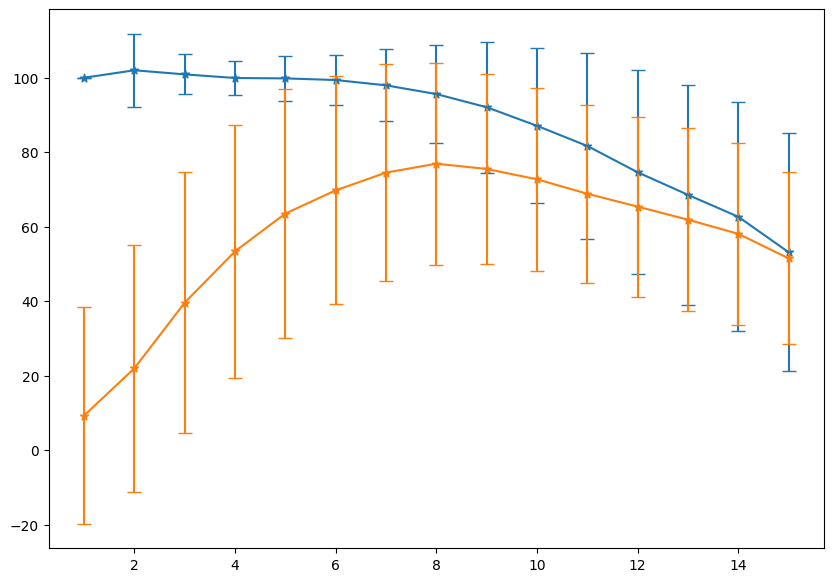

In [20]:
import matplotlib.pyplot as plt
x=np.arange(1,16,1)
plt.figure(figsize=(10,7))
plt.scatter(x,efficiency[:,0],marker='*')
plt.errorbar(x,efficiency[:,0],yerr=efficiency[:,1],capsize=5.0)
plt.scatter(x,efficiency[:,2],marker='*')
plt.errorbar(x,efficiency[:,2],yerr=efficiency[:,3],capsize=5.0)

In [21]:
np.savetxt('/Users/francescostraniero/Documents/Pembroke_4th_year/MPhys_Proj/CNN_efficiency',efficiency)

## Updated training set: use different pulses values


In [2]:
from CNN_trainer import CNN_training_data_generator

In [18]:
from S1_generator.S1_event_generator import S1_event
X3 = np.ndarray(shape=(10000,5000))
Y3 = np.zeros((10000,5000))
for i in range(10000):

    X3[i,:],n,p = S1_event(3)
    p1 = np.zeros(len(p))
    for j in range(len(p)):
        p1[j] = p[j]
    Y3[i,p]=1

a=np.ndarray(shape=(10000,5000))
b=np.zeros((10000,5000))
for i in range(10000):

    a[i,:],n,p = S1_event(7)
    p1 = np.zeros(len(p))
    for j in range(len(p)):
        p1[j] = p[j]
    b[i,p]=1
X3=np.concatenate((X3,a))
Y3=np.concatenate((Y3,b))

a=np.ndarray(shape=(10000,5000))
b=np.zeros((10000,5000))
for i in range(10000):

    a[i,:],n,p = S1_event(10)
    p1 = np.zeros(len(p))
    for j in range(len(p)):
        p1[j] = p[j]
    b[i,p]=1
X3=np.concatenate((X3,a))
Y3=np.concatenate((Y3,b))

a=np.ndarray(shape=(10000,5000))
b=np.zeros((10000,5000))
for i in range(10000):

    a[i,:],n,p = S1_event(14)
    p1 = np.zeros(len(p))
    for j in range(len(p)):
        p1[j] = p[j]
    b[i,p]=1
X3=np.concatenate((X3,a))
Y3=np.concatenate((Y3,b))



In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, UpSampling1D
from tensorflow.keras.layers import TimeDistributed, Activation

X3 = X3[..., np.newaxis]  # Add a channel dimension for Conv1D (shape: [samples, seq_length, 1])
Y3 = Y3[..., np.newaxis]  # Add a channel dimension for output (shape: [samples, seq_length, 1])

# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X3, Y3, test_size=0.2, random_state=42)

# Build the CNN model for sequence labeling
model2 = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=(5000, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    UpSampling1D(size=2),  # Upsample back to original sequence length
    Conv1D(filters=1, kernel_size=3, activation='sigmoid', padding='same')  # Output layer
])

# Compile the model
model2.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary classification for each time step
              metrics=['accuracy'])

# Train the model
history2 = model2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss2, accuracy2 = model2.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy2:.2f}")

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 59s 58ms/step - accuracy: 0.9947 - loss: 0.0278 - val_accuracy: 0.9999 - val_loss: 4.0946e-04
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 56s 56ms/step - accuracy: 0.9999 - loss: 3.2022e-04 - val_accuracy: 1.0000 - val_loss: 1.8617e-04
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 60s 60ms/step - accuracy: 1.0000 - loss: 1.6658e-04 - val_accuracy: 1.0000 - val_loss: 1.2748e-04
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 58s 58ms/step - accuracy: 1.0000 - loss: 1.1626e-04 - val_accuracy: 1.0000 - val_loss: 9.8397e-05
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 58s 58ms/step - accuracy: 1.0000 - loss: 1.0213e-04 - val_accuracy: 1.0000 - val_loss: 8.2575e-05
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 59s 59ms/step - accuracy: 1.0000 - loss: 7.6293e-05 - val_accuracy: 1.0000 - val_loss: 9.4667e-05
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 59s 59ms/step - accuracy: 1.0000 - loss: 7.4822e-05 - val_accuracy: 1.0000 - val_loss: 5.9473e-05
Epoch 8/10
1000/1000 ━━━

In [30]:
from S1_generator.S1_event_generator import S1_event
a,n,p = S1_event(18)
test = np.ndarray(shape=(1,5000,1))
test[0,:,0]=a
prediction = model2.predict(test)

fff2 = np.arange(0,len(a),1)

        
output2 = fff2[(prediction[0,:,0]>0.4)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [31]:
count= np.zeros((15,1000,2))
for i in range(15):
    for j in range(1000):
        y,n,p = S1_event(i+1)
        test = np.ndarray(shape=(1,5000,1))
        test[0,:,0]=y
        
        prediction2 = model2.predict(test, verbose=0)
        
        
        fff2 = np.arange(0,len(a),1)

        
        output2 = fff2[(prediction2[0,:,0]>0.4)]

        
        n2 = len(output2)
        count[i,j,0]=n
        
        count[i,j,1]=n2

efficiency = np.zeros((15,4))
for i in range(15):
    efficiency[i,0]=100*np.mean(count[i,:,1])/(i+1)
    efficiency[i,1]=100*np.std(count[i,:,1])/(i+1)
   

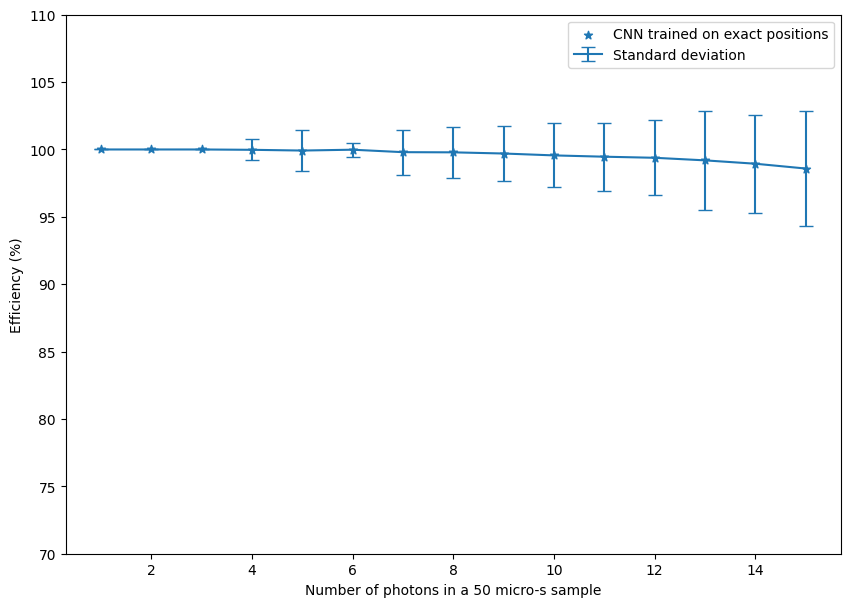

In [39]:
x=np.arange(1,16,1)
plt.figure(figsize=(10,7))

plt.scatter(x,efficiency[:,0],marker='*')
plt.errorbar(x,efficiency[:,0],yerr=efficiency[:,1],capsize=5.0)
plt.ylim(70,110)
plt.xlabel('Number of photons in a 50 micro-s sample')
plt.ylabel('Efficiency (%)')
plt.legend(('CNN trained on exact positions','Standard deviation'))